In [1]:
import findspark

import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt

-------------------------------------------
Time: 2023-01-18 18:07:20
-------------------------------------------
('#Crypto', 60)
('#crypto', 39)
('#NFT', 33)
('#BNB', 18)
('#ETH', 16)
('#NFTs', 15)
('#BNB\u202f\u202f\u202f', 14)
('#cryptocurrency', 13)
('#Bitcoin', 11)
('#BTC', 11)
...



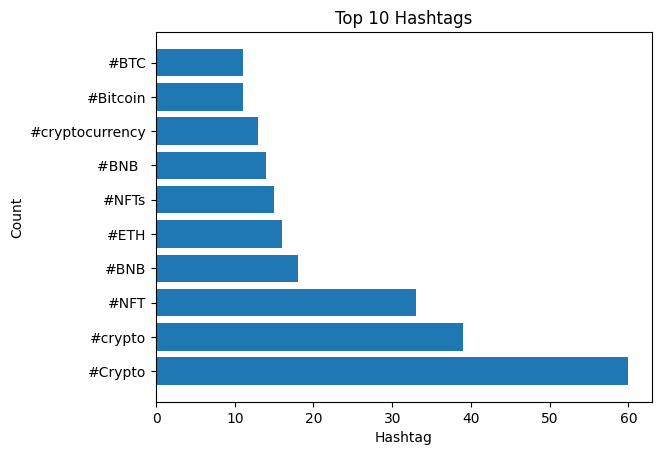

In [ ]:
# 1. Create a new SparkSession
spark = SparkSession.builder.appName("TwitterTrends").master("local[2]").getOrCreate()

# 2. Create a new StreamingContext with a batch interval of 10 seconds
ssc = StreamingContext(spark.sparkContext, 10)

# 3. Set log level to "ERROR"
spark.sparkContext.setLogLevel("ERROR")

# 4. Set checkpoint location
ssc.checkpoint("TwitterTrends_checkpoint")

# 5. Create a new DStream by connecting to a socket on the local machine on port 5554
socket_stream = ssc.socketTextStream('localhost', 5554)

# 6. Split the text by newline character to get individual tweets
tweets = socket_stream.flatMap(lambda text: text.split("\n"))

# 7. Split each tweet by space character to get individual words
words = tweets.flatMap(lambda tweet: tweet.split(" "))

# 8. Filter only the words starting with "#" to get hashtags
hashtags = words.filter(lambda word: word.startswith("#"))

# 9. Map each hashtag to a tuple of (hashtag, 1) to get paired hashtags
paired_hashtags = hashtags.map(lambda word: (word, 1))

# 10. Count paired hashtags by window and slide
counts = paired_hashtags.reduceByKeyAndWindow(lambda a, b: a + b, None, 300, 300)

# 11. Filter only the hashtags which are mentioned more than 5 times
filtered_hashtags = counts.filter(lambda hashtag_count: hashtag_count[1] > 5)

# 12. Sort the filtered hashtags by count in descending order
most_popular_hashtags = filtered_hashtags.transform(lambda rdd: rdd.sortBy(lambda x: x[1],ascending=False))

# 13. Print the top 10 most popular hashtags
most_popular_hashtags.pprint(10)

def process_rdd(rdd):
    # Get the top 10 hashtags and their counts
    top_10_hashtags = rdd.take(10)
    # Extract the hashtags and counts into separate lists
    hashtags = [word[0] for word in top_10_hashtags]
    counts = [word[1] for word in top_10_hashtags]

    # Plot a bar chart of the top 10 hashtags
    plt.barh(hashtags, counts)
    plt.xlabel('Hashtag')
    plt.ylabel('Count')
    plt.title('Top 10 Hashtags')
    plt.show()

most_popular_hashtags.foreachRDD(process_rdd)

-------------------------------------------
Time: 2023-01-18 18:05:00
-------------------------------------------



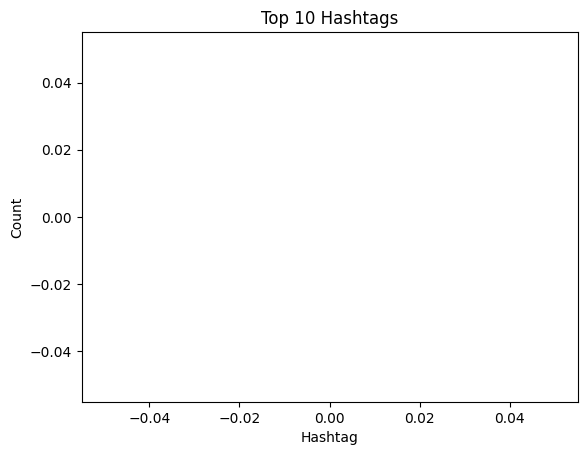

-------------------------------------------
Time: 2023-01-18 18:05:10
-------------------------------------------



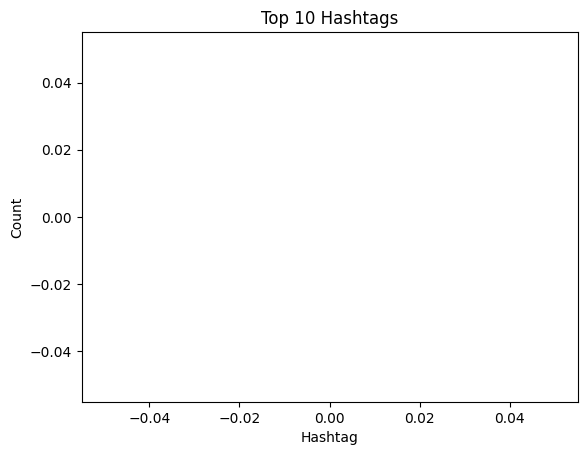

-------------------------------------------
Time: 2023-01-18 18:05:20
-------------------------------------------
('#Crypto', 6)



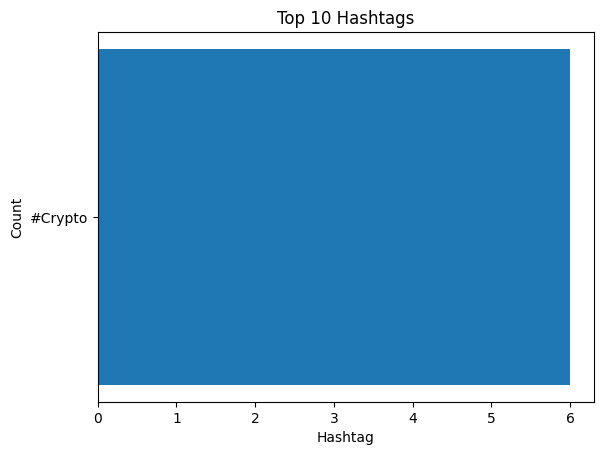

-------------------------------------------
Time: 2023-01-18 18:05:30
-------------------------------------------
('#crypto', 12)
('#Crypto', 10)
('#NFTs', 6)



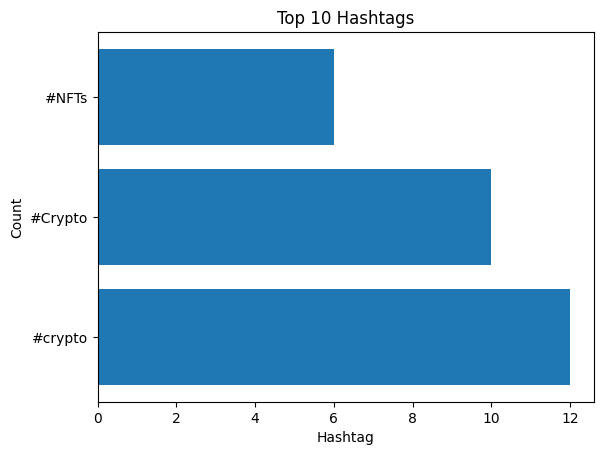

-------------------------------------------
Time: 2023-01-18 18:05:40
-------------------------------------------
('#Crypto', 16)
('#crypto', 14)
('#BTC', 6)
('#NFTs', 6)



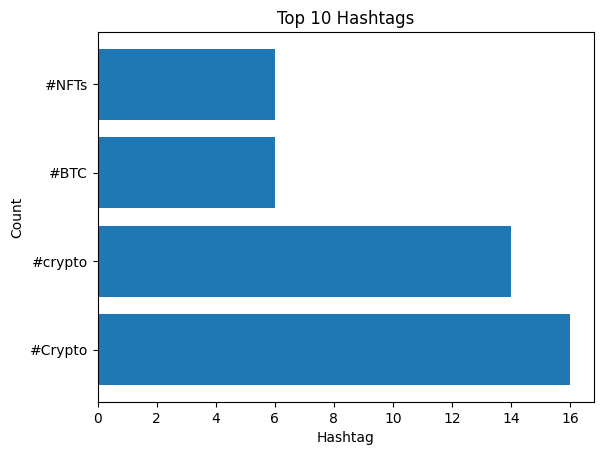

-------------------------------------------
Time: 2023-01-18 18:05:50
-------------------------------------------
('#Crypto', 19)
('#crypto', 16)
('#NFTs', 9)
('#cryptocurrency', 8)
('#BNB', 6)
('#Bitcoin', 6)
('#BTC', 6)



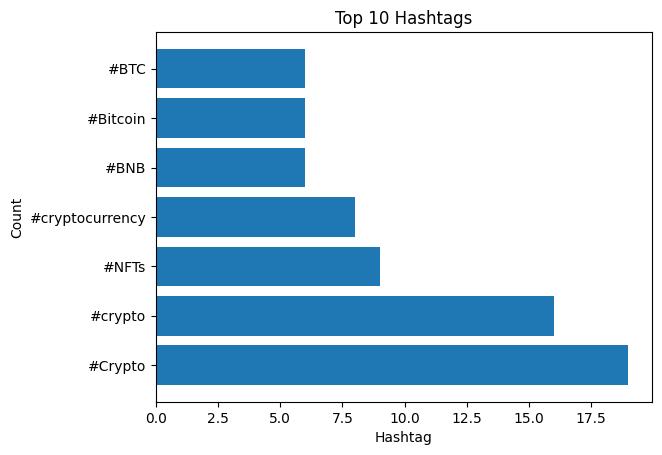

-------------------------------------------
Time: 2023-01-18 18:06:00
-------------------------------------------
('#Crypto', 25)
('#crypto', 17)
('#NFTs', 10)
('#BNB', 9)
('#cryptocurrency', 9)
('#NFT', 8)
('#Bitcoin', 7)
('#BTC', 7)
('#ETH', 6)



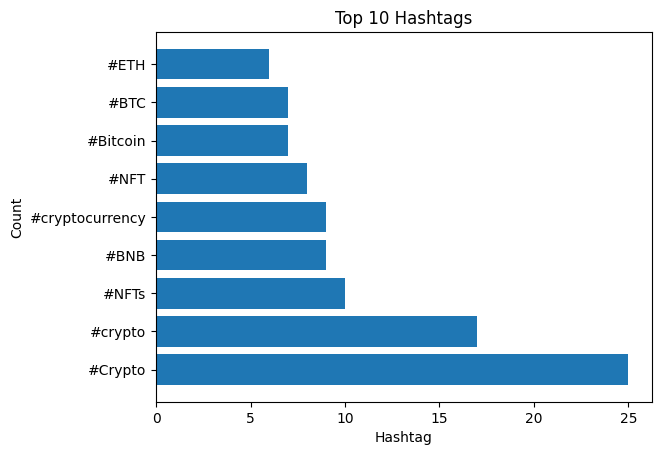

-------------------------------------------
Time: 2023-01-18 18:06:10
-------------------------------------------
('#Crypto', 27)
('#crypto', 18)
('#NFT', 11)
('#BNB', 10)
('#NFTs', 10)
('#cryptocurrency', 9)
('#Bitcoin', 7)
('#BTC', 7)
('#ETH', 6)



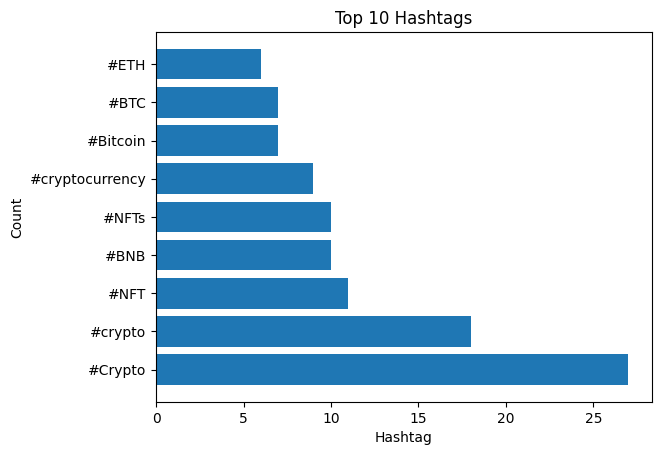

-------------------------------------------
Time: 2023-01-18 18:06:20
-------------------------------------------
('#Crypto', 30)
('#crypto', 20)
('#NFT', 16)
('#BNB', 12)
('#NFTs', 10)
('#cryptocurrency', 9)
('#Bitcoin', 7)
('#BTC', 7)
('#ETH', 7)
('#bitcoin', 6)



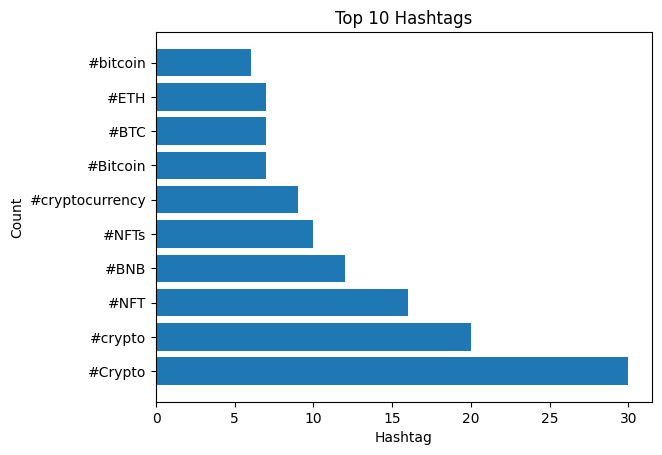

-------------------------------------------
Time: 2023-01-18 18:06:30
-------------------------------------------
('#Crypto', 37)
('#crypto', 23)
('#NFT', 18)
('#BNB', 12)
('#NFTs', 12)
('#cryptocurrency', 10)
('#Bitcoin', 9)
('#BTC', 9)
('#ETH', 9)
('#blockchain', 6)
...



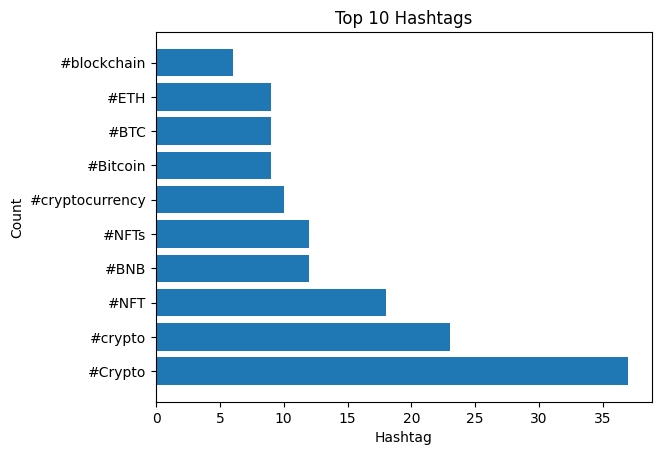

-------------------------------------------
Time: 2023-01-18 18:06:40
-------------------------------------------
('#Crypto', 42)
('#crypto', 28)
('#NFT', 23)
('#BNB', 14)
('#NFTs', 14)
('#cryptocurrency', 11)
('#BTC', 10)
('#Bitcoin', 9)
('#ETH', 9)
('#HODL', 9)
...



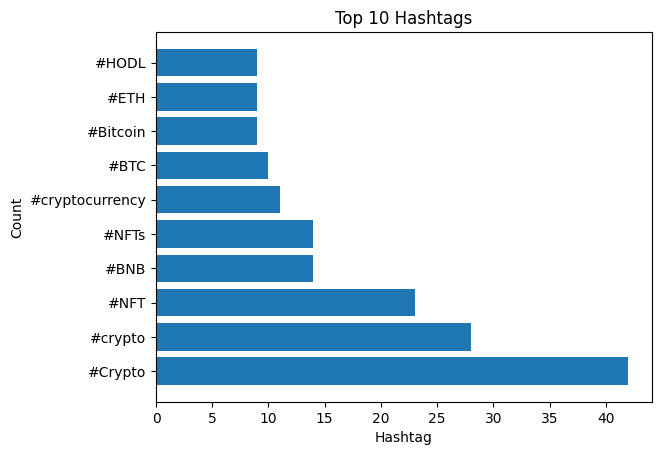

-------------------------------------------
Time: 2023-01-18 18:06:50
-------------------------------------------
('#Crypto', 49)
('#crypto', 30)
('#NFT', 26)
('#BNB', 15)
('#NFTs', 14)
('#ETH', 12)
('#cryptocurrency', 12)
('#BTC', 10)
('#BOXA', 10)
('#Bitcoin', 9)
...



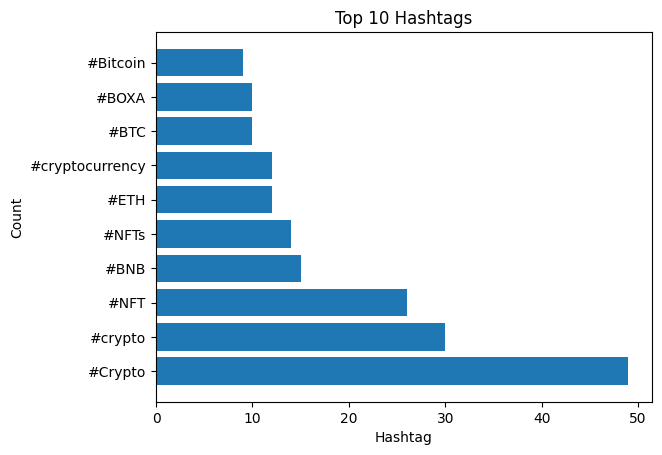

-------------------------------------------
Time: 2023-01-18 18:07:00
-------------------------------------------
('#Crypto', 55)
('#crypto', 34)
('#NFT', 30)
('#BNB', 17)
('#NFTs', 14)
('#ETH', 13)
('#cryptocurrency', 12)
('#BNB\u202f\u202f\u202f', 11)
('#Bitcoin', 10)
('#BTC', 10)
...



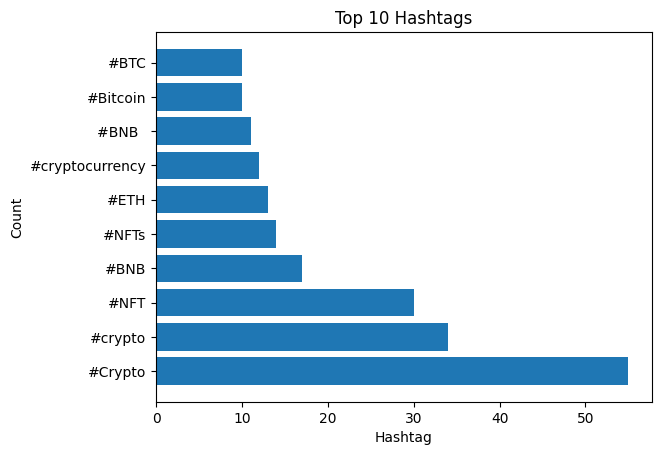

In [3]:
ssc.start()             # Start the computation 
#ssc.awaitTermination()  # Wait for the computation to terminate

In [ ]:
ssc.stop()